In [21]:
import numpy as np
from utils import *
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge

### Load and split data

In [22]:
X_train, y_train = np.loadtxt('../data/train.dat', usecols=(0,1), unpack=True)
X_test, y_test = np.loadtxt('../data/test.dat', usecols=(0,1), unpack=True)

X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(X_train[:5], y_train[:5], sep='\n\n')

[[1998.]
 [2008.]
 [1975.]
 [2004.]
 [1980.]]

[[65.88791334]
 [67.21901249]
 [64.3206674 ]
 [66.92166376]
 [66.11401206]]


In [23]:
model = Pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=1),
    StandardScaler(),
    RidgeRegressor(λ=1)
)

model.fit(X_train, y_train)
print(model.predictor.coef_)

[[64.17597825]
 [ 0.54640678]]


In [24]:
from itertools import permutations, combinations

x = np.array([[1,2], [3,4]])
print(x)
print(PolynomialFeatures(degree=2).fit_transform(x))

a = [1,2]
for i in range(3):
    print(list(combinations(a, i)))

[[1 2]
 [3 4]]
[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]]
[()]
[(1,), (2,)]
[(1, 2)]


### Perform 6-fold cross validation for each degree d in [0,12]

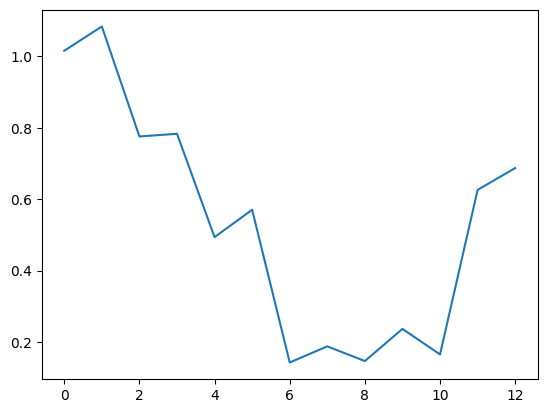

In [26]:
k = 6

degree = list(range(13))
cv_err = list()
for d in degree:
    model = Pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=d),
        StandardScaler(),
        LinearRegressor()
    )
    cv_err.append(
        cross_val_score(model, X_train, y_train, k)
    )

plt.plot(degree, cv_err)
plt.show()